## Burger's Equation

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}
\end{equation}
$$

Combination of non-linear convection and diffusion.

4 Parameters: 

- $x$ :  spatial coordinate
- $t$ : temporal coordinate
- $u(x, t)$ : speed of fluid at indicated spatial and temporal coordinates
- $v$ : kinematic viscosity of fluid

Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
\end{equation}
$$

As before, once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation}
$$

### Initial ad Boundary Conditions

This has an analytical solution, given by:

$$
\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}
$$

The boundary condition will be:

$$
\begin{equation}
u(0) = u(2\pi)
\end{equation}
$$

This is called a *periodic* boundary condition. Pay attention! This will cause you a bit of headache if you don't tread carefully.

The initial condition for this problem is going to be:

$$
\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi(t=0) = \phi_0 &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}
$$

In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

### Introducing Sympy

In [2]:
sympy.init_printing() #this allows the output to look like Latex text

In [3]:
#setting up a symbolic variable
a = sympy.symbols('a')
a

In [4]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

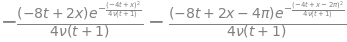

In [5]:
phiprime = phi.diff(x)
phiprime

### Introducing lamdify function

In [6]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

u_lamb = lambdify((t, x, nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1, 4, 3)))

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4
The value of u at t=1, x=4, nu=3 is 3.49170664206445


### Back to our problem

In [7]:
# Set parameters.
nx = 101  # number of spatial grid points
L = 2.0 * numpy.pi  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.07  # viscosity
nt = 100  # number of time steps to compute
sigma = 0.1  # CFL limit
dt = sigma * dx**2 / nu  # time-step size

# Discretize the domain.
x = numpy.linspace(0.0, L, num=nx)

Here we use the method called as **list comprehension** to make our code look cleaner
```Python
u0 = numpy.empty(nx)

for i, x0 in enumerate(x):
    u0[i] = u_lamb(t, x0, nu)
```

But there's a cleaner, more beautiful way to do this -- *list comprehension*.  

We can create a list of all of the appropriate `u` values by typing

```Python
[u_lamb(t, x0, nu) for x0 in x]

In [8]:
# Set initial conditions.
t = 0.0
u0 = numpy.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

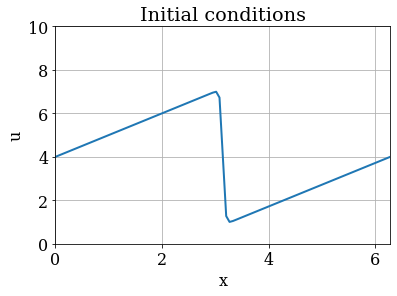

In [9]:
# Plot the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation}
$$

What does $u_{i+1}^n$ *mean* when $i$ is already at the end of the frame?

Think about this for a minute before proceeding.

To understand the answer of the question above, refer the following video : https://www.youtube.com/watch?v=EXg8N4upZeQ

See the video to understand how the discretization is working exactly

In [10]:
# Integrate the Burgers' equation in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

As in the integration of the 1D Diffusion equation, for each temporal position, the calculation within all the spatial points of the previous temporal position and then updated in the temporary storage 'un'. 

This is repeated for all temporal positions. 

However, unlike the 1D Diffusion equation, the boundary points also need to be updated here. 

The discretization method uses the sliced arrays like u[1:-1], u[:-2], etc. exclude the boundary points, i.e. index 0 and last index. 

As the boundary points play a role in the discretization, unlike the 1D Convection and 1D Diffusion equation discretization, they need to be updated for each temporal position. 

Also, remember how the Periodic Boundary Condition i.e. u(0) = u(2 * pi) works as seen in the video link. It is due to this Periodic Boundary condition that we are able to find the values at the end of the spatial frame. 

In [11]:
# Compute the analytical solution.
u_analytical = numpy.array([u_lamb(nt * dt, xi, nu) for xi in x])

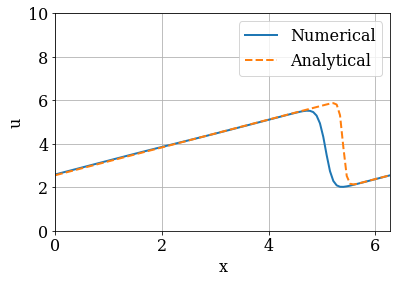

In [12]:
# Plot the numerical solution along with the analytical solution.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, u_analytical, label='Analytical',
            color='C1', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

## Animation of the solutions

In [13]:
from matplotlib import animation
from IPython.display import HTML

In [14]:
def burgers(u0, dx, dt, nu, nt=20):
    """
    Computes the numerical solution of the 1D Burgers' equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    dx : float
        The grid spacing.
    dt : float
        The time-step size.
    nu : float
        The viscosity.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        u[1:-1] = (un[1:-1] -
                   un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                   nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
        # Update boundary points.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-1]) +
                nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] -
                un[-1] * dt / dx * (un[-1] - un[-2]) +
                nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [15]:
# Compute the history of the numerical solution.
u_hist = burgers(u0, dx, dt, nu, nt=nt)

In [16]:
# Compute the history of the analytical solution.
u_analytical = [numpy.array([u_lamb(n * dt, xi, nu) for xi in x]) for n in range(nt)]
type(u_analytical)

list

Here two for loops are running. One for feeding x values to the function u_lamb and repeating this till all spatial points are covered for one temporal moment. 

And the other for loop to repeat the u_lamb function operation for nt number of time (i.e. for all temporal positions). 

Also, note that u_analytical is a list of numpy arrays, each array containing u values at all x positions for a particular temporal moment. 

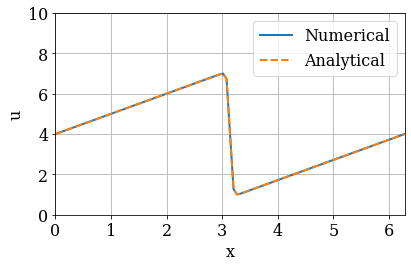

In [17]:
#setting the initial template for the animation
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
u0_analytical = numpy.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = pyplot.plot(x, u0, label='Numerical',
                    color='C0', linestyle='-', linewidth=2)[0]
line2 = pyplot.plot(x, u0_analytical, label='Analytical',
                    color='C1', linestyle='--', linewidth=2)[0]
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0)
fig.tight_layout()

In [18]:
def update_plot(n, u_hist, u_analytical):
    """
    Update the lines y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    u_analytical : list of numpy.ndarray objects
        The history of the analytical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [19]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist, u_analytical),
                               interval=100)

In [20]:
# Display the video.
HTML(anim.to_html5_video())